### **Importing Libraries**

In [41]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import random

In [42]:
SEED = 7
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

### **Loading Data**

In [43]:
train_df = pd.read_csv("./MNIST/mnist_train.csv")
test_df = pd.read_csv("./MNIST/mnist_test.csv")

X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values
X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

### **Creating FCNN**

In [44]:
class FCNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## **Q2.1**

In [45]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

### **Training**

In [46]:
model = FCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
epochs = 9

for epoch in range(epochs):
    total_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 326.2008
Epoch 2, Loss: 150.1330
Epoch 3, Loss: 102.7741
Epoch 4, Loss: 77.9225
Epoch 5, Loss: 60.2140
Epoch 6, Loss: 48.7023
Epoch 7, Loss: 39.8927
Epoch 8, Loss: 31.9682
Epoch 9, Loss: 26.4113


### **Evaluation**

In [48]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Test Accuracy:", 100 * correct / total, "%")

Test Accuracy: 97.72 %


In [49]:
weights = model.fc1.weight.data.numpy()
print(weights.shape)

(128, 784)


### **Visualising Neurons**

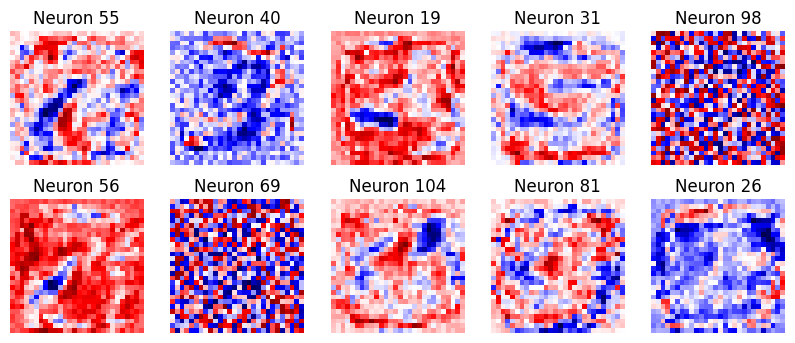

In [50]:
np.random.seed(42)
rand_indx = np.random.choice(128, 10, replace=False)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for ax, neuron_idx in zip(axes.flat, rand_indx):
    w = weights[neuron_idx].reshape(28, 28)
    ax.imshow(w, cmap='seismic')
    ax.axis('off')
    ax.set_title(f"Neuron {neuron_idx}")

plt.show()

## **Q2.2**

### **Scrambling Data**

In [51]:
perm = torch.randperm(784)

X_train_scrambled = X_train[:, perm]
X_test_scrambled = X_test[:, perm]

train_scrambled = TensorDataset(X_train_scrambled, y_train)
test_scrambled = TensorDataset(X_test_scrambled, y_test)

train_loader_scrambled = DataLoader(train_scrambled, batch_size=64, shuffle=True)
test_loader_scrambled = DataLoader(test_scrambled, batch_size=64)


### **Training**

In [52]:
model2 = FCNN()

criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [53]:
epochs = 9

for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader_scrambled:
        optimizer2.zero_grad()
        outputs = model2(images)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 317.9190
Epoch 2, Loss: 145.6885
Epoch 3, Loss: 103.2389
Epoch 4, Loss: 78.6753
Epoch 5, Loss: 62.6658
Epoch 6, Loss: 49.5840
Epoch 7, Loss: 41.2170
Epoch 8, Loss: 33.9788
Epoch 9, Loss: 27.0442


### **Evaluation**

In [54]:
correct2 = 0
total2 = 0

with torch.no_grad():
    for images, labels in test_loader_scrambled:
        outputs = model2(images)
        _, predicted = torch.max(outputs,1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()
        
print("Test Accuracy:", 100 * correct2 / total2, "%")

Test Accuracy: 97.74 %


### **Visulasing Neurons**

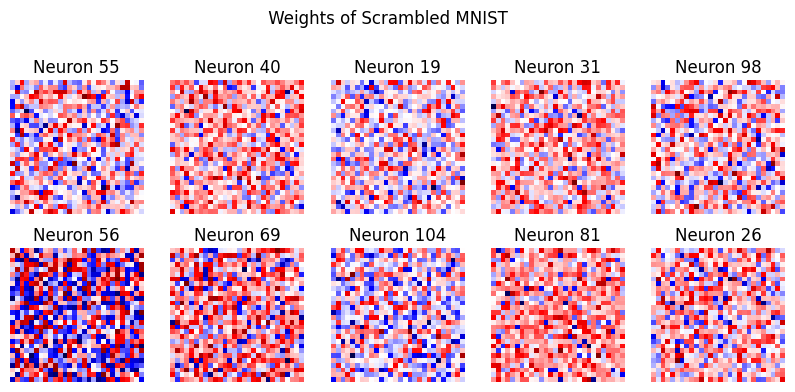

In [55]:
weights_scrambled = model2.fc1.weight.data.numpy()
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for ax, neuron_idx in zip(axes.flat, rand_indx):
    w = weights_scrambled[neuron_idx].reshape(28, 28)
    ax.imshow(w, cmap='seismic')
    ax.axis('off')
    ax.set_title(f"Neuron {neuron_idx}")

plt.suptitle(" Weights of Scrambled MNIST", y=1.05)
plt.show()